### Отчет по лабораторной работе №3  

**по дисциплине: «Машинное обучение»  
на тему: «Предварительная обработка данных»  
Вариант №7**  
  
**Выполнил: Сапожников В.О. 19-ИВТ-3**  

**Цель работы:** получение навыков работы с методами классификации.  

**Текст задания:**  
  

    1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
    2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
    3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
    4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
    5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
    6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
    7. Заполните пропущенные значения в данных;
    8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
    9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.
  
**Кодировка классификаторов:**  
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);   
3 – линейный классификатор (персептрон);

In [88]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
%matplotlib inline


mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [89]:
# Имена столбкоц
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [90]:
# Размерность таблицы до преобразований
mushroom_df.shape

(8124, 23)

**1.Переведенное описание признаков.**

1.  cap-shap - форма шляпки
2.  cap-surface - поверхность шляпки
3.  cap-color - цвет шляпки
4.  bruises - пятна
5.  odor - запах
6.  gill-attachment - форма жабер
7.  gill-spacing - расстояние между жабрами
8.  gill-size - размер жабер
9.  gill-color - цвет жабер
10. stalk-shape - форма ножки
11. stalk-root - корень
12. stalk-surface-above-ring - форма ножки выше юбки
13. stalk-surface-below-ring - форма ножки ниже юбки
14. stalk-color-above-ring - цвет ножки выше юбки
15. stalk-color-below-ring - цвет ножки ниже юбки
16. veil-type - форма юбки
17. veil-color - цвет юбки
18. ring-number - количество колец
19. ring-type - тип кольца
20. spore-print-color - цвет спор
21. population - популяция
22. habitat - среда обитания

In [91]:
# Удаление дубликатов
mushroom_df.dropna()
mushroom_df.drop_duplicates()
mushroom_df.shape

(8124, 23)

**3. Оценка сбалансированности данных по классам**

<AxesSubplot:xlabel='count', ylabel='class'>

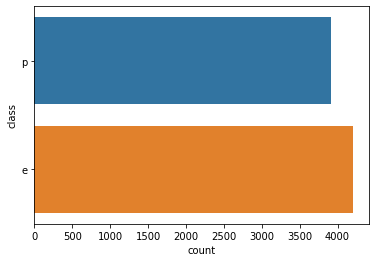

In [92]:
sns.countplot(data = mushroom_df, y='class')

**Вывод:** данные сбансированы по классам

**5. Замена категориальных признаков**

In [93]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [94]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Не один из признаковы не является числовым, следотельно все признаки являются _категориальными._

In [95]:
# Функция для отделения числовых и категориальных признаков
def data_normalize(df):
    numb_columns=[]
    cat_columns=[]
    for column in df.columns:
        # Если тип колоны отличен от object, то заносим его в список числовых признаков
        if df[column].dtype.name!='object': numb_columns.append(column)
            
        # иначе в список категориальных
        else: cat_columns.append(column)
    return numb_columns, cat_columns

In [96]:
# Получение списков категориальных и числовых признаков
numb_columns, cat_columns = data_normalize(mushroom_df)
print("Числовые признаки: ", numb_columns)
print("Категориальные признки: ", cat_columns)

Числовые признаки:  []
Категориальные признки:  ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Из полученных списков можно сделать вывод, что ***все признаки представленные в таблице являются категориальными.***

In [97]:
print('Количество категориальлных признаков:', len(cat_columns))
print('Количество числовых признаков: ', len(numb_columns))

Количество категориальлных признаков: 23
Количество числовых признаков:  0


In [98]:
# Замена категориальных признаков
# Производим векторизацию категорильаных признаков при помощи LabelEncoder'a
label_encoder = LabelEncoder()

for column in cat_columns:
    mushroom_df[column] = pd.Series(label_encoder.fit_transform(mushroom_df[column]))
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [99]:
numb_columns, cat_columns = data_normalize(mushroom_df)
print("Числовые признаки: ", numb_columns)
print("Категориальные признки: ", cat_columns)

Числовые признаки:  ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Категориальные признки:  []


In [100]:
print('Количество категориальлных признаков:', len(cat_columns))
print('Количество числовых признаков: ', len(numb_columns))

Количество категориальлных признаков: 0
Количество числовых признаков:  23


**4. Выполните масштабирование количественных признаков**

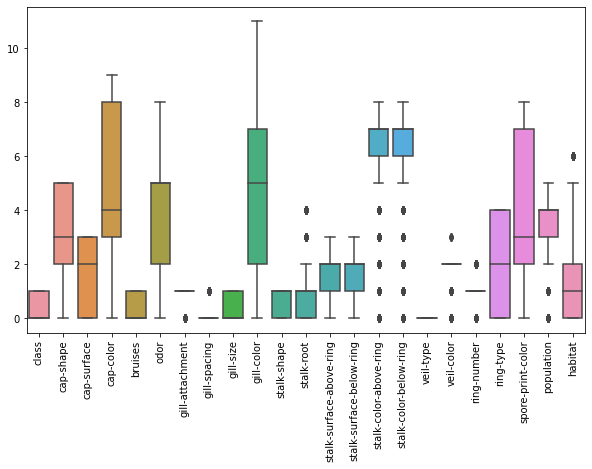

In [101]:
# Диаграмма "ящик с усами" до масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=mushroom_df[numb_columns])
plt.show()

In [102]:
# Масштабирование данны при помощи MinMaxScaler
# Для каждого значения в объектеMinMaxScalerвычитает минимальное значение в объекте и затем делит на диапазон.
# Диапазон - это разница между исходным максимумом и исходным минимумом.
scaler = preprocessing.MinMaxScaler()
mushroom_df[numb_columns] = scaler.fit_transform(mushroom_df[numb_columns])
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667


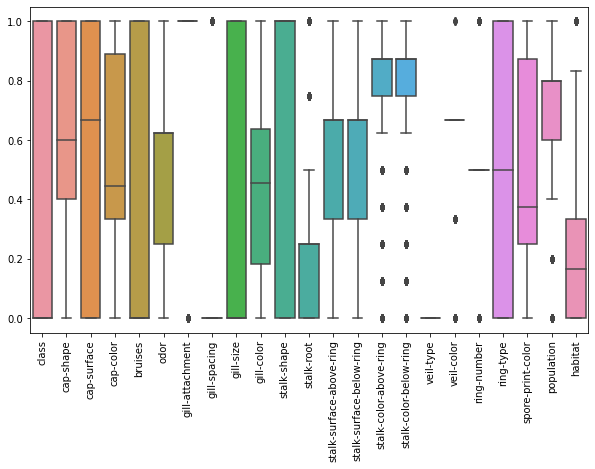

In [103]:
# Диаграмма "ящик с усами" после масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=mushroom_df[numb_columns])
plt.show()

**6. Оцените корреляцию между признаками**

<AxesSubplot:>

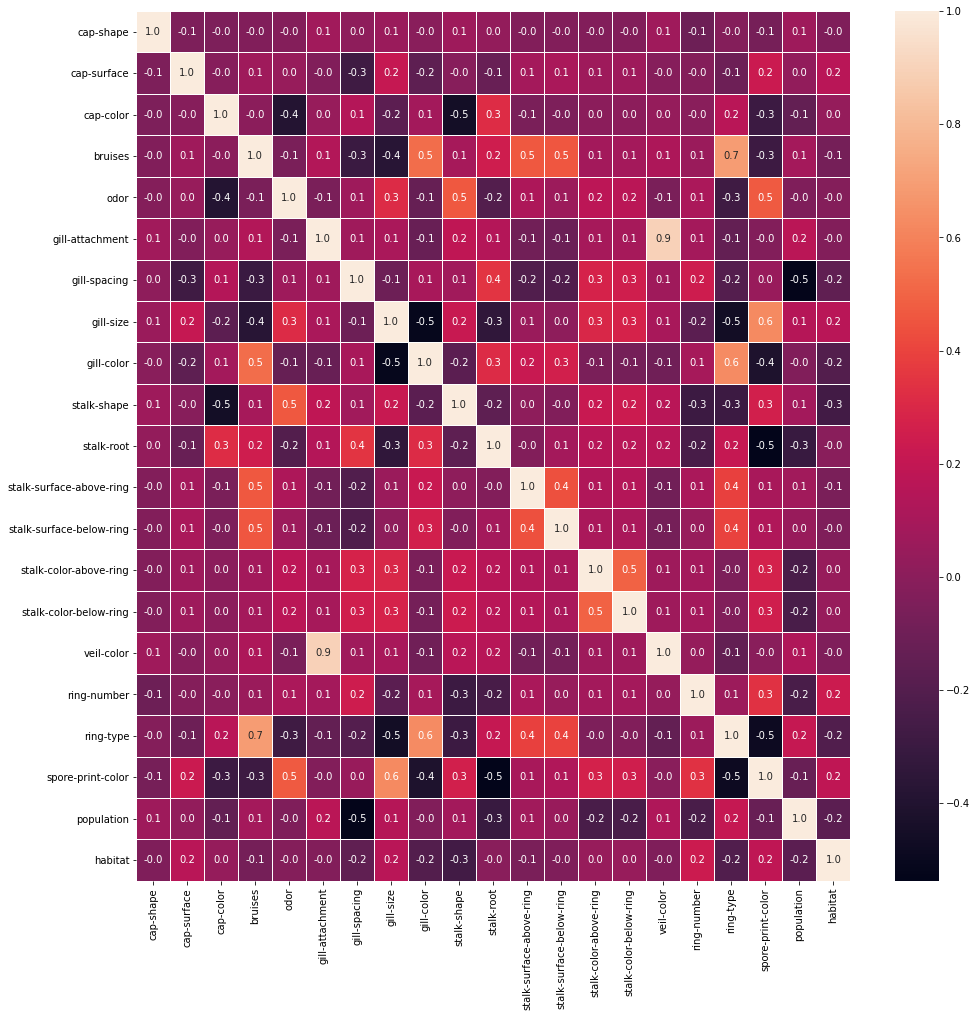

In [104]:
mushroom_df = mushroom_df.drop('veil-type', axis=1)

# Положимельный коэф корреляции - прямая зависимость между признаками
# Отрицательный коэф корреляции - обратная зависимость между признаками
# Коэф корреляуии близкий к 0 - признаки не зависимы
corr = mushroom_df.drop('class', axis=1).corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)

**7.Заполните пропущенные значения в данных**

In [105]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

***Пропущенных значений нет***

**8.Решите поставленную задачу классификации в соответствии с заданием.**

In [106]:
# Разделение выборки на тренировочную и тестовую части
train_x, test_x, train_y, test_y = train_test_split(mushroom_df.drop('class', axis=1).values, 
                                                    mushroom_df['class'].values, 
                                                    test_size=0.3,
                                                    random_state = 10)

**Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)**

In [107]:
# Задание стратегии "один против всех"
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(train_x, train_y).decision_function(test_x)

rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(4, 6, 40),
          'weights': ['uniform', 'distance']}

In [108]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(train_x, train_y)
r = rnc_grid.best_estimator_.radius_neighbors

rnc = RadiusNeighborsClassifier(4)
rnc.fit(train_x, train_y)

score_y = rnc.predict(test_x)

print('Оценка точности: %.7f'%(accuracy_score(test_y, score_y)))
print('Лучшее: %.7f'%(rnc_grid.best_score_))

Точность: 0.5233798
Лучшее: 0.9081964


**Линейный классификатор (Персептрон)**

In [109]:
ppn = Perceptron()
ppn_params = {'alpha': np.linspace(0, 1, 30),
              'max_iter': [x for x in range(1, 60)]}

ppn_grid = GridSearchCV(estimator=ppn, 
                        param_grid=ppn_params) 
ppn_grid.fit(train_x, train_y)

#find best alpha,iter from Grid net
alpha = ppn_grid.best_estimator_.alpha
max_iter = ppn_grid.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, 
                 max_iter = max_iter)
ppn.fit(train_x, train_y)
y_score = ppn.predict(test_x)

print('Оценка точности: %.7f'%(accuracy_score(test_y, score_y)))
print('Лучшее: %.7f'%(ppn_grid.best_score_))

Точность: 0.5233798
Лучшее: 0.9335185


**PR - кривая**

In [110]:
prob_ppn = CalibratedClassifierCV(ppn).fit(train_x, train_y).predict_proba(test_x)
prob_rnc = rnc.predict_proba(test_x)

In [111]:
def addPR(prob, class_1, name, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, class_1])
    aps = average_precision_score(test, prob[:, class_1])
    plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))

def addROC(prob, class_1, name, test):
    tpr, fpr, thresholds = roc_curve(test, prob[:, class_1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % (name, roc_auc))

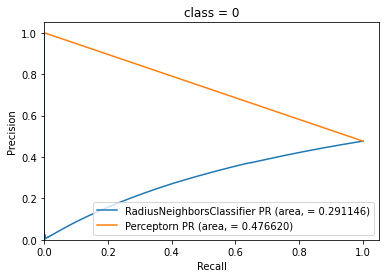

In [112]:
addPR(prob_ppn, 0, 'RadiusNeighborsClassifier', test_y)
addPR(prob_rnc, 0, 'Perceptorn', test_y)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('class = 0')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

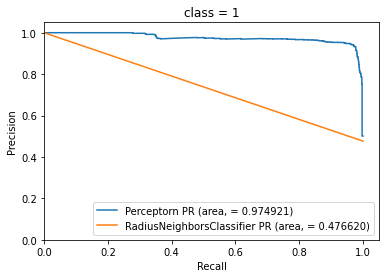

In [113]:
addPR(prob_ppn, 1, 'Perceptorn', test_y)
addPR(prob_rnc, 1, 'RadiusNeighborsClassifier', test_y)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('class = 1')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

**ROC-кривая**

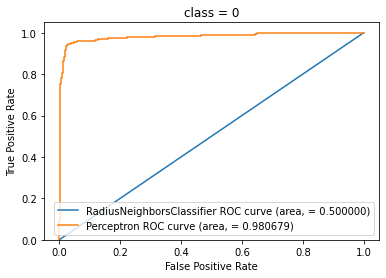

In [114]:
addROC(prob_rnc, 0, 'RadiusNeighborsClassifier', test_y)
addROC(prob_ppn, 0, 'Perceptron', test_y)

plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('class = 0')
plt.show()

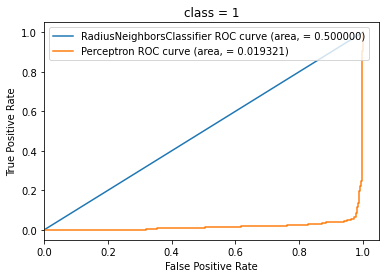

In [115]:
addROC(prob_rnc, 1, 'RadiusNeighborsClassifier', test_y)
addROC(prob_ppn, 1, 'Perceptron', test_y)

plt.xlim([0, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2, fontsize = 'medium')
plt.title('class = 1')
plt.show()

**9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.**

Вывод: **линейный классификатор (Персептрон)** лучше